<a href="https://colab.research.google.com/github/Serarrs/dap-2024/blob/main/les08/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
<br>
**«БЕЛГОРОДСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ
ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ»
<br>
(НИУ «БелГУ»)**
<br><br>
ИНСТИТУТ ИНЖЕНЕРНЫХ И ЦИФРОВЫХ ТЕХНОЛОГИЙ
<br><br>
**Кафедра информационных и робототехнических систем**
<br><br><br><br>
**ОТЧЕТ**
<br>
по лабораторной работе №8
<br>
на тему: «Кластеризация»
<br>
по дисциплине
<br>
«Анализ данных на Python»
<br>
студента очной формы обучения
<br>
направления подготовки
<br><br><br>
09.03.02 – Информационные системы и технологии
<br>
3 курса группы 12002208
<br>
Кузьмина Анатолия Витальевича

<br><br><br><br><div>
<div align="right">

Проверил:
<br>
ДВОПУ
<br>
Чеботарев С. А.
<div><br><br><br>
<div align="center">

Белгород 2025
<div>
___________

<div align="center">

<br>Ход работы<br>

Задача. Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0

Первые 5 строк данных:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


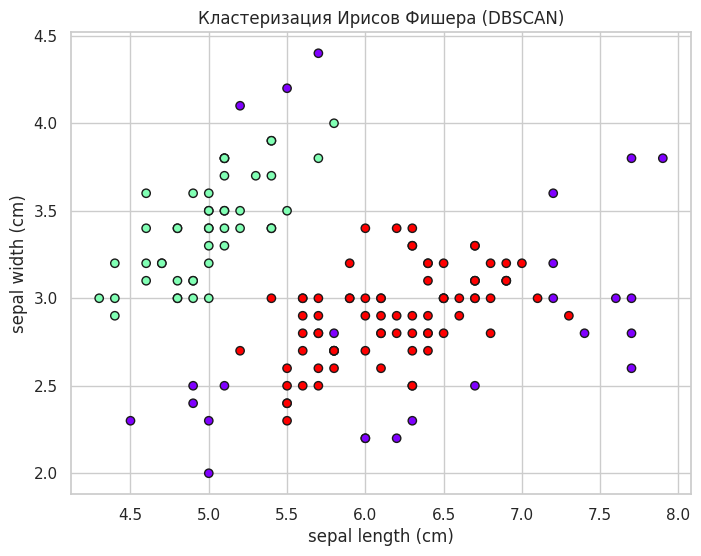


Количество кластеров: 2
Количество выбросов (обозначены как -1): 26
DBSCAN позволяет выделить кластеры без заранее заданного количества,
и хорошо справляется с выбросами, но чувствителен к параметрам eps и min_samples.


In [78]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

# 1.Импортируйте модель данных "Ирисы Фишера".
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

print("\nПервые 5 строк данных:")
print(X.head())

# 2.Выполните нормализацию данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.Постройте модель кластеризации используя алгоритм DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples
db = DBSCAN(eps=0.6, min_samples=5)
clusters = db.fit_predict(X_scaled)
X["cluster"] = clusters

# 4.Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X["sepal length (cm)"],
    X["sepal width (cm)"],
    c=X["cluster"],
    cmap="rainbow",
    edgecolor='k'
)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Кластеризация Ирисов Фишера (DBSCAN)")
plt.grid(True)
plt.show()

# 5.Сделайте вывод
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"\nКоличество кластеров: {n_clusters}")
print(f"Количество выбросов (обозначены как -1): {n_noise}")
print("DBSCAN позволяет выделить кластеры без заранее заданного количества,")
print("и хорошо справляется с выбросами, но чувствителен к параметрам eps и min_samples.")
